# Imports

In [1]:
%run ../imports.py

In [2]:
PATH = '../../BDForecasting_V2/'
PATH_IMG = './images/'

# Auxiliar methods

In [3]:
def normality_numeric_variables(df, colname, save=False, figname=None, figformat='png'):
    stats.probplot(df[colname], plot=plt)
    plt.xlabel('Probability diagram (normal) of variable {}'.format(colname))
    if save:
        plt.savefig(figname, format=figformat, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [4]:
def categoric_variable_distribution(df, colname, figsize=(10,10)):
    df[colname].value_counts(ascending=True,normalize=True).tail(20).plot.barh(figsize=figsize)
    plt.show()

# Load datasets

In [5]:
df_dummy = pd.read_csv('{}BaseVertical_V4.csv'.format(PATH))[['SITE', 'DATES', 'OCCUPANCY_COUNT']]
df_boa = pd.read_csv('{}boa_vertical.csv'.format(PATH))
df_aon = pd.read_csv('{}AON_1B_vertical.csv'.format(PATH))

# Dummy dataset

> ## Data preparation

In [6]:
df_dummy_grouped_dates = df_dummy.groupby(['DATES']).sum()

> ## Initial exploration

In [7]:
df_dummy.head()

,SITE,DATES,OCCUPANCY_COUNT
0,S&C-PAD: REExecSvcs-PU,2018-01-01 01:00:00,0
1,S&C-PAD: REExecSvcs-PU,2018-01-01 02:00:00,0
2,S&C-PAD: REExecSvcs-PU,2018-01-01 03:00:00,0
3,S&C-PAD: REExecSvcs-PU,2018-01-01 04:00:00,0
4,S&C-PAD: REExecSvcs-PU,2018-01-01 05:00:00,0


In [8]:
df_dummy_grouped_dates.head()

,OCCUPANCY_COUNT
DATES,
2018-01-01 01:00:00,3
2018-01-01 02:00:00,2
2018-01-01 03:00:00,3
2018-01-01 04:00:00,3
2018-01-01 05:00:00,3


In [9]:
df_dummy.isna().sum()

SITE               0
DATES              0
OCCUPANCY_COUNT    0
dtype: int64

In [10]:
df_dummy.isnull().sum()

SITE               0
DATES              0
OCCUPANCY_COUNT    0
dtype: int64

> ## Numeric variables

In [11]:
len(df_dummy[df_dummy['OCCUPANCY_COUNT'] > 0])

1687826

In [12]:
len(df_dummy)

2697256

In [13]:
len(df_dummy[df_dummy['OCCUPANCY_COUNT'] == 0])/len(df_dummy)

0.37424330504779674

In [14]:
len(df_dummy_grouped_dates[df_dummy_grouped_dates['OCCUPANCY_COUNT'] == 0])/len(df_dummy_grouped_dates)

0.011107584893684545

In [15]:
dummy_dt_num_var = df_dummy_grouped_dates._get_numeric_data().columns.values
dummy_dt_num_var

array(['OCCUPANCY_COUNT'], dtype=object)

In [16]:
dummy_dt_num_var.shape[0]

1

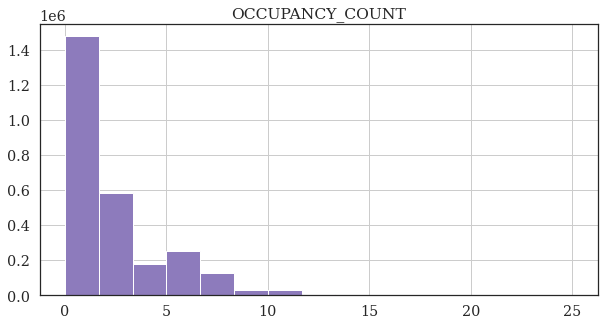

In [17]:
sns.set(style = 'white')
plt.rc('font', family='serif')

c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histogram of distributions
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df_dummy[dummy_dt_num_var].hist(bins = 15, color = colours[0], figsize = (10,5))
plt.savefig("{}dummy_dataset_notgrouped_distribution_occ_count.png".format(PATH_IMG), format="png")

array([[<AxesSubplot:title={'center':'OCCUPANCY_COUNT'}>]], dtype=object)

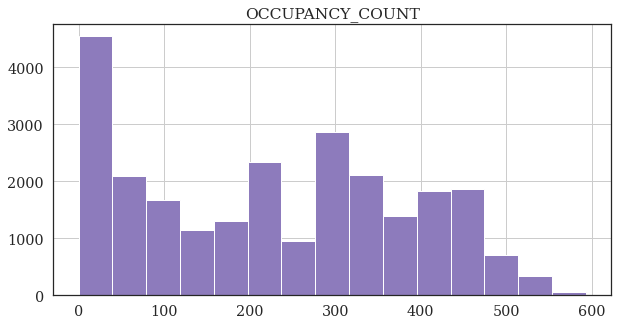

In [18]:
sns.set(style = 'white')
plt.rc('font', family='serif')

c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histogram of distributions
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df_dummy_grouped_dates[dummy_dt_num_var].hist(bins = 15, color = colours[0], figsize = (10,5))
# plt.savefig("{}dummy_dataset_distribution_occ_count.png".format(PATH_IMG), format="png")

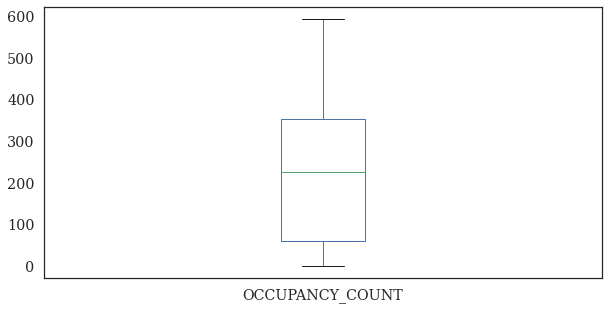

In [19]:
dummy_dt_barplot_occ = df_dummy_grouped_dates[dummy_dt_num_var].plot(kind='box', figsize=[10,5])
# plt.savefig("{}dummy_dataset_barplot_occ_count.png".format(PATH_IMG), format="png")

In [18]:
df_dummy_grouped_dates[dummy_dt_num_var].describe()

,OCCUPANCY_COUNT
count,25208.000000
mean,227.936171
std,156.999274
min,0.000000
25%,61.000000
50%,226.000000
75%,352.000000
max,593.000000


In [19]:
(df_dummy_grouped_dates[dummy_dt_num_var]==0).sum()

OCCUPANCY_COUNT    280
dtype: int64

> ## Normality
Identify outliers

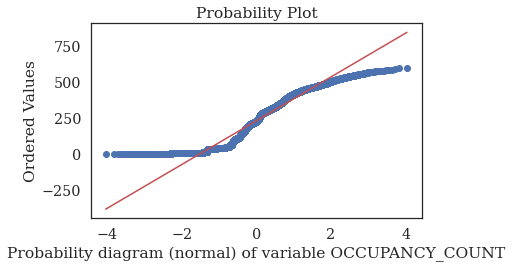

In [20]:
figname = "{}dummy_dataset_probability_plot_occ_count.png".format(PATH_IMG)
normality_numeric_variables(df_dummy_grouped_dates, 'OCCUPANCY_COUNT', save=True, figname=figname, figformat='png')

In [23]:
for num_col in dummy_dt_num_var:
    _, pval = stats.normaltest(df_dummy[dummy_dt_num_var])
    if(pval < 0.05):
        print("Columna {} does not follow a normal distribution".format(num_col))

Columna OCCUPANCY_COUNT does not follow a normal distribution


> ## Categorical variables

In [26]:
dummy_dt_all_variables = df_dummy.columns.values
dummy_dt_categorical_variables = np.setdiff1d(dummy_dt_all_variables, dummy_dt_num_var)
dummy_dt_categorical_variables

array(['DATES', 'SITE'], dtype=object)

In [27]:
for i in df_dummy[dummy_dt_categorical_variables].columns.values:
    print("Values of ", i,'\n')
    print(df_dummy[i].value_counts())
    print('\n\n')

Values of  DATES 

2020-11-04 01:00:00    107
2018-12-18 20:00:00    107
2018-11-04 23:00:00    107
2020-10-27 20:00:00    107
2019-06-05 01:00:00    107
                      ... 
2019-02-01 08:00:00    107
2019-12-20 15:00:00    107
2020-08-29 06:00:00    107
2019-08-12 02:00:00    107
2018-06-05 12:00:00    107
Name: DATES, Length: 25208, dtype: int64



Values of  SITE 

GTO-VGD: WIMBusTecA-PU-EX    25208
S&C-AWV: GblCorpSer-PU-EX    25208
GTO-VAA: GTOAdmin-PR-EX      25208
PB-TAA: PBAdmin-PU-EX        25208
S&C-IAC: QF&WLPM-PU          25208
                             ...  
GTO-VCA: CoSmBuOpAd-PU-EX    25208
GTO-VLU: Div&StratExec-PR    25208
S&C-AEO: SSMoGTOHRM-PR-EX    25208
S&C-ADC: EnvSoc&Gov-PU       25208
S&C-AEB: CB&WD&A-PU-DE       25208
Name: SITE, Length: 107, dtype: int64





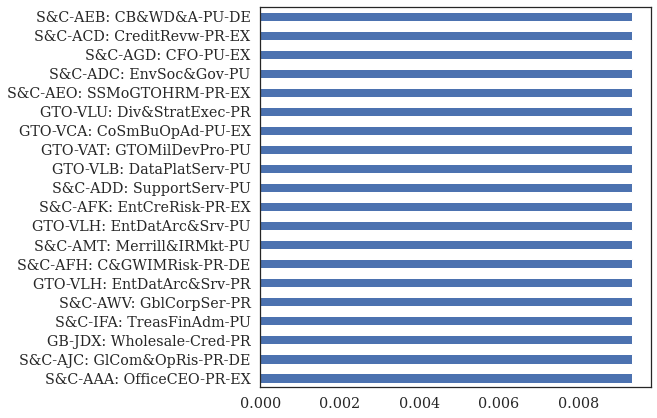

In [28]:
categoric_variable_distribution(df_dummy, 'SITE', figsize=(7,7))

> ## Variations by one unit time (day)

In [29]:
displaced = df_dummy_grouped_dates['OCCUPANCY_COUNT'].shift(1)
displaced[:5]

DATES
2018-01-01 01:00:00    NaN
2018-01-01 02:00:00    3.0
2018-01-01 03:00:00    2.0
2018-01-01 04:00:00    3.0
2018-01-01 05:00:00    3.0
Name: OCCUPANCY_COUNT, dtype: float64

In [30]:
df_dummy_grouped_dates['var_diaria']=df_dummy_grouped_dates['OCCUPANCY_COUNT'].pct_change()
df_dummy_grouped_dates['var_diaria'][:5]

DATES
2018-01-01 01:00:00         NaN
2018-01-01 02:00:00   -0.333333
2018-01-01 03:00:00    0.500000
2018-01-01 04:00:00    0.000000
2018-01-01 05:00:00    0.000000
Name: var_diaria, dtype: float64

>> ### Applying the Hodrick-Prescott filter to separate in trend and cyclic component.

In [31]:
oc_ciclo, oc_tend = sm.tsa.filters.hpfilter(df_dummy_grouped_dates['OCCUPANCY_COUNT'])
df_dummy_grouped_dates['oc_tend'] = oc_tend

In [32]:
daily_performance = (1 + df_dummy_grouped_dates['OCCUPANCY_COUNT'].pct_change()).cumprod()
df_dummy_grouped_dates['dai_performance'] = daily_performance
df_dummy_grouped_dates['dai_performance']

DATES
2018-01-01 01:00:00         NaN
2018-01-01 02:00:00    0.666667
2018-01-01 03:00:00    1.000000
2018-01-01 04:00:00    1.000000
2018-01-01 05:00:00    1.000000
                         ...   
2020-12-31 19:00:00         NaN
2020-12-31 20:00:00         NaN
2020-12-31 21:00:00         NaN
2020-12-31 22:00:00         NaN
2020-12-31 23:00:00         NaN
Name: dai_performance, Length: 25208, dtype: float64

>> ### Zeros,nan,null after calculations

In [33]:
df_dummy_grouped_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25208 entries, 2018-01-01 01:00:00 to 2020-12-31 23:00:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OCCUPANCY_COUNT  25208 non-null  int64  
 1   var_diaria       25047 non-null  float64
 2   oc_tend          25208 non-null  float64
 3   dai_performance  71 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.5+ MB


In [34]:
df_dummy_grouped_dates.var_diaria[df_dummy_grouped_dates.var_diaria==0].count()

390

In [35]:
df_dummy_grouped_dates.oc_tend[df_dummy_grouped_dates.oc_tend==0].count()

0

In [36]:
df_dummy_grouped_dates.isna().sum()

OCCUPANCY_COUNT        0
var_diaria           161
oc_tend                0
dai_performance    25137
dtype: int64

In [37]:
df_dummy_grouped_dates.isnull().sum()

OCCUPANCY_COUNT        0
var_diaria           161
oc_tend                0
dai_performance    25137
dtype: int64

> ## Plots

In [38]:
df_dummy_grouped_dates['OCCUPANCY_COUNT']

DATES
2018-01-01 01:00:00      3
2018-01-01 02:00:00      2
2018-01-01 03:00:00      3
2018-01-01 04:00:00      3
2018-01-01 05:00:00      3
                      ... 
2020-12-31 19:00:00    212
2020-12-31 20:00:00    190
2020-12-31 21:00:00    153
2020-12-31 22:00:00     91
2020-12-31 23:00:00     34
Name: OCCUPANCY_COUNT, Length: 25208, dtype: int64

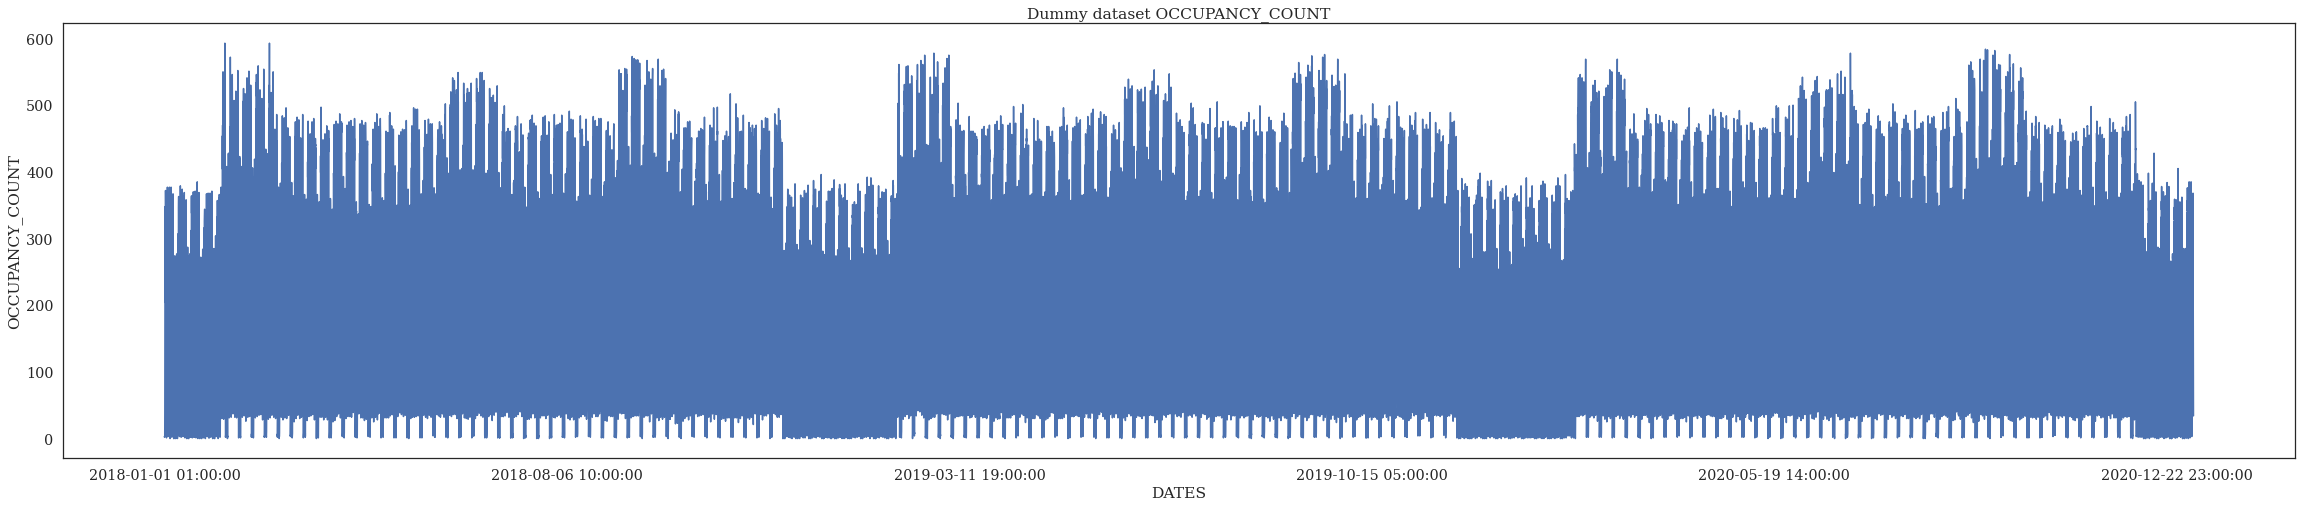

In [39]:
dummy_dt_occ_plot = df_dummy_grouped_dates['OCCUPANCY_COUNT'].plot(figsize=(40, 8))
dummy_dt_occ_plot.set_ylabel('OCCUPANCY_COUNT')
plt.title('Dummy dataset OCCUPANCY_COUNT')
plt.savefig("{}dummy_dataset_occ_count.png".format(PATH_IMG), format="png")

# BOA dataset

> ## Data preparation

In [40]:
df_boa_grouped_dates = df_boa.groupby(['DATES']).sum()

> ## Initial exploration

In [41]:
df_boa.head()

,SITE,DATES,OCCUPANCY_COUNT
0,S&C-PAD: REExecSvcs-PU,2019-12-02,8
1,S&C-PAD: REExecSvcs-PU,2019-12-03,10
2,S&C-PAD: REExecSvcs-PU,2019-12-04,9
3,S&C-PAD: REExecSvcs-PU,2019-12-05,8
4,S&C-PAD: REExecSvcs-PU,2019-12-09,8


In [42]:
df_boa_grouped_dates.head()

,OCCUPANCY_COUNT
DATES,
2019-12-02,2072
2019-12-03,2174
2019-12-04,2214
2019-12-05,2152
2019-12-09,2145


In [43]:
df_boa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SITE             4644 non-null   object
 1   DATES            4644 non-null   object
 2   OCCUPANCY_COUNT  4644 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 109.0+ KB


In [44]:
df_boa.isna().sum()

SITE               0
DATES              0
OCCUPANCY_COUNT    0
dtype: int64

In [45]:
df_boa.isnull().sum()

SITE               0
DATES              0
OCCUPANCY_COUNT    0
dtype: int64

> ## Numeric variables

In [61]:
len(df_boa[df_boa['OCCUPANCY_COUNT'] > 0])

4369

In [62]:
len(df_boa)

4644

In [80]:
len(df_boa[df_boa['OCCUPANCY_COUNT'] == 0])/len(df_boa)

0.05921619293712317

In [85]:
len(df_boa_grouped_dates[df_boa_grouped_dates['OCCUPANCY_COUNT'] == 0])/len(df_boa_grouped_dates)

0.0

In [46]:
boa_dt_num_var = df_boa_grouped_dates._get_numeric_data().columns.values
boa_dt_num_var

array(['OCCUPANCY_COUNT'], dtype=object)

In [47]:
boa_dt_num_var.shape[0]

1

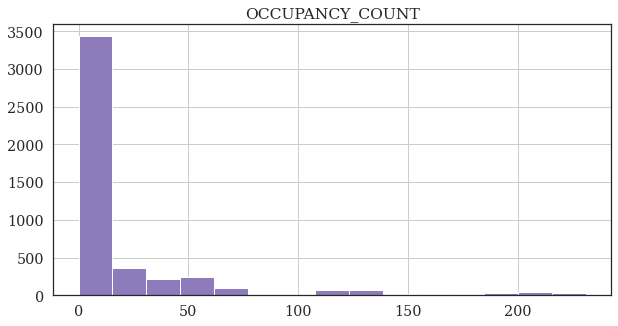

In [79]:
sns.set(style = 'white')
plt.rc('font', family='serif')

c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histogram of distributions
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df_boa[boa_dt_num_var].hist(bins = 15, color = colours[0], figsize = (10,5))
plt.savefig("{}boa_dataset_notgrouped_distribution_occ_count.png".format(PATH_IMG), format="png")

array([[<AxesSubplot:title={'center':'OCCUPANCY_COUNT'}>]], dtype=object)

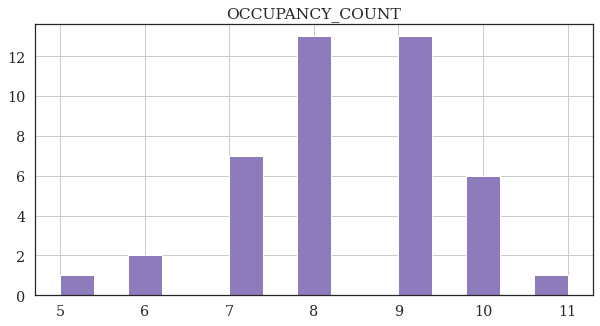

In [78]:
# sns.set(style = 'white')
# plt.rc('font', family='serif')

# c_background = '#FFFFFF'

# colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

# #histogram of distributions
# sns.set(style = 'white', font_scale=1.3)
# plt.rc('font', family='serif')

# group = df_boa.groupby('SITE').get_group(df_boa.SITE[35])
# group[boa_dt_num_var].hist(bins = 15, color = colours[0], figsize = (10,5))
# # plt.savefig("{}boa_dataset_notgrouped_distribution_occ_count.png".format(PATH_IMG), format="png")

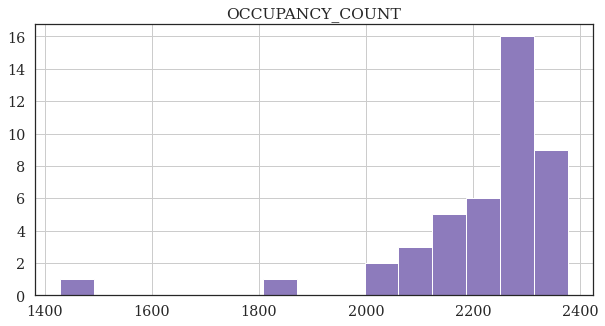

In [48]:
sns.set(style = 'white')
plt.rc('font', family='serif')

c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histogram of distributions
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df_boa_grouped_dates[boa_dt_num_var].hist(bins = 15, color = colours[0], figsize = (10,5))
plt.savefig("{}boa_dataset_distribution_occ_count.png".format(PATH_IMG), format="png")

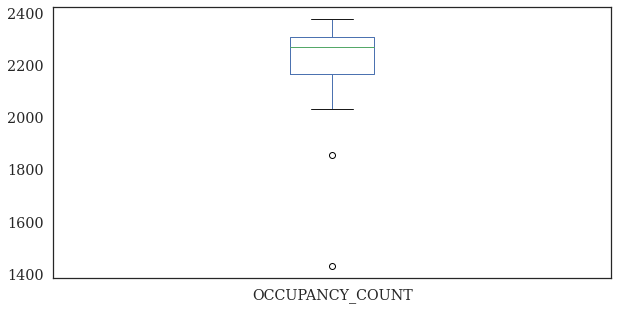

In [145]:
boa_dt_barplot_occ = df_boa_grouped_dates[boa_dt_num_var].plot(kind='box', figsize=[10,5])
plt.savefig("{}boa_dataset_barplot_occ_count.png".format(PATH_IMG), format="png")

In [147]:
df_boa_grouped_dates[boa_dt_num_var].describe()

,OCCUPANCY_COUNT
count,43.00000
mean,2217.27907
std,164.39200
min,1429.00000
25%,2164.00000
50%,2271.00000
75%,2309.50000
max,2377.00000


In [149]:
(df_boa_grouped_dates[boa_dt_num_var]==0).sum()

OCCUPANCY_COUNT    0
dtype: int64

> ## Normality
Identify outliers

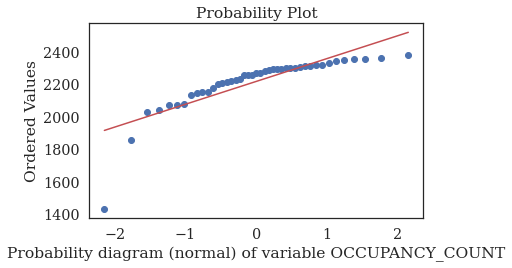

In [151]:
figname = "{}boa_dataset_probability_plot_occ_count.png".format(PATH_IMG)
normality_numeric_variables(df_boa_grouped_dates, 'OCCUPANCY_COUNT', save=True, figname=figname, figformat='png')

In [198]:
for num_col in boa_dt_num_var:
    _, pval = stats.normaltest(df_boa_grouped_dates[boa_dt_num_var])
    if(pval < 0.05):
        print("Columna {} does not follow a normal distribution".format(num_col))

Columna OCCUPANCY_COUNT does not follow a normal distribution


> ## Categorical variables

In [45]:
dummy_dt_all_variables = df_dummy.columns.values
dummy_dt_categorical_variables = np.setdiff1d(dummy_dt_all_variables, dummy_dt_num_var)
dummy_dt_categorical_variables

array(['DATES', 'SITE'], dtype=object)

In [48]:
for i in df_dummy[dummy_dt_categorical_variables].columns.values:
    print("Values of ", i,'\n')
    print(df_dummy[i].value_counts())
    print('\n\n')

Values of  DATES 

2018-12-31 13:00:00    107
2019-08-23 16:00:00    107
2020-02-09 22:00:00    107
2019-04-13 09:00:00    107
2020-07-05 01:00:00    107
                      ... 
2018-06-11 19:00:00    107
2019-04-13 10:00:00    107
2018-12-08 12:00:00    107
2019-07-25 04:00:00    107
2019-07-19 10:00:00    107
Name: DATES, Length: 25208, dtype: int64



Values of  SITE 

GTO-VLB: DataPlatServ-PU      25208
S&C-ADC: EnvSoc&Gov-PU        25208
S&C-AJC: GlCom&OpRis-PR-DE    25208
S&C-AWV: GblCorpSer-PU-EX     25208
MER-TCB: WIMOpts/RS-PR-DE     25208
                              ...  
S&C-IJM: CTGblLiqMgmt-PR      25208
GTO-VLD: GTODataMgmt-PU       25208
S&C-AGC: GblFinContr-PR-EX    25208
GTO-VCA: CoSmBuOpAd-PU-EX     25208
S&C-AWL: LocalMktsOrg-PR      25208
Name: SITE, Length: 107, dtype: int64





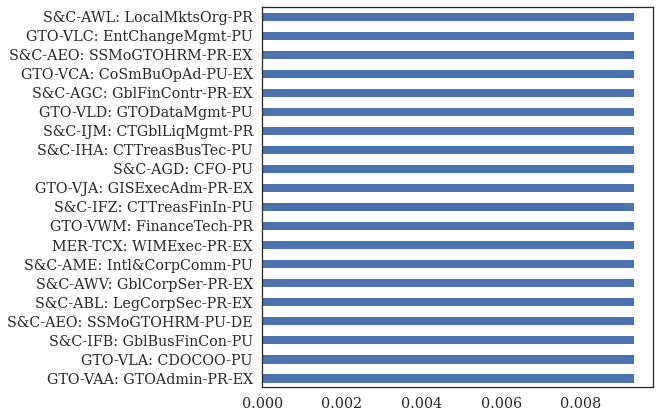

In [62]:
categoric_variable_distribution(df_dummy, 'SITE', figsize=(7,7))

> ## Variations by one unit time (day)

In [161]:
displaced = df_boa_grouped_dates['OCCUPANCY_COUNT'].shift(1)
displaced[:5]

DATES
2019-12-02       NaN
2019-12-03    2072.0
2019-12-04    2174.0
2019-12-05    2214.0
2019-12-09    2152.0
Name: OCCUPANCY_COUNT, dtype: float64

In [162]:
df_boa_grouped_dates['var_diaria']=df_boa_grouped_dates['OCCUPANCY_COUNT'].pct_change()
df_boa_grouped_dates['var_diaria'][:5]

DATES
2019-12-02         NaN
2019-12-03    0.049228
2019-12-04    0.018399
2019-12-05   -0.028004
2019-12-09   -0.003253
Name: var_diaria, dtype: float64

>> ### Applying the Hodrick-Prescott filter to separate in trend and cyclic component.

In [163]:
oc_ciclo, oc_tend = sm.tsa.filters.hpfilter(df_boa_grouped_dates['OCCUPANCY_COUNT'])
df_boa_grouped_dates['oc_tend'] = oc_tend

In [164]:
daily_performance = (1 + df_boa_grouped_dates['OCCUPANCY_COUNT'].pct_change()).cumprod()
df_boa_grouped_dates['dai_performance'] = daily_performance
df_boa_grouped_dates['dai_performance']

DATES
2019-12-02         NaN
2019-12-03    1.049228
2019-12-04    1.068533
2019-12-05    1.038610
2019-12-09    1.035232
2019-12-10    1.062259
2019-12-11    1.065637
2019-12-12    1.030405
2019-12-16    0.980212
2019-12-17    1.003861
2019-12-18    0.985521
2019-12-19    0.895753
2020-01-02    0.689672
2020-01-06    1.096042
2020-01-07    1.104247
2020-01-08    1.071911
2020-01-09    1.113417
2020-01-13    1.075290
2020-01-14    1.119691
2020-01-15    1.119208
2020-01-16    1.100869
2020-01-21    1.089286
2020-01-22    1.109073
2020-01-23    1.090251
2020-01-27    1.105695
2020-01-28    1.135618
2020-01-29    1.134653
2020-01-30    1.115830
2020-02-03    1.076737
2020-02-04    1.106178
2020-02-05    1.096525
2020-02-06    1.039575
2020-02-10    1.116313
2020-02-11    1.124517
2020-02-12    1.139479
2020-02-13    1.106660
2020-02-18    1.110039
2020-02-19    1.108591
2020-02-20    1.000000
2020-02-24    1.130309
2020-02-25    1.147201
2020-02-26    1.138031
2020-02-27    1.088803
Name:

>> ### Zeros,nan,null after calculations

In [165]:
df_boa_grouped_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2019-12-02 to 2020-02-27
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OCCUPANCY_COUNT  43 non-null     int64  
 1   var_diaria       42 non-null     float64
 2   oc_tend          43 non-null     float64
 3   dai_performance  42 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.7+ KB


In [167]:
df_boa_grouped_dates.var_diaria[df_boa_grouped_dates.var_diaria==0].count()

0

In [168]:
df_boa_grouped_dates.oc_tend[df_boa_grouped_dates.oc_tend==0].count()

0

In [169]:
df_boa_grouped_dates.isna().sum()

OCCUPANCY_COUNT    0
var_diaria         1
oc_tend            0
dai_performance    1
dtype: int64

In [170]:
df_boa_grouped_dates.isnull().sum()

OCCUPANCY_COUNT    0
var_diaria         1
oc_tend            0
dai_performance    1
dtype: int64

> ## Plots

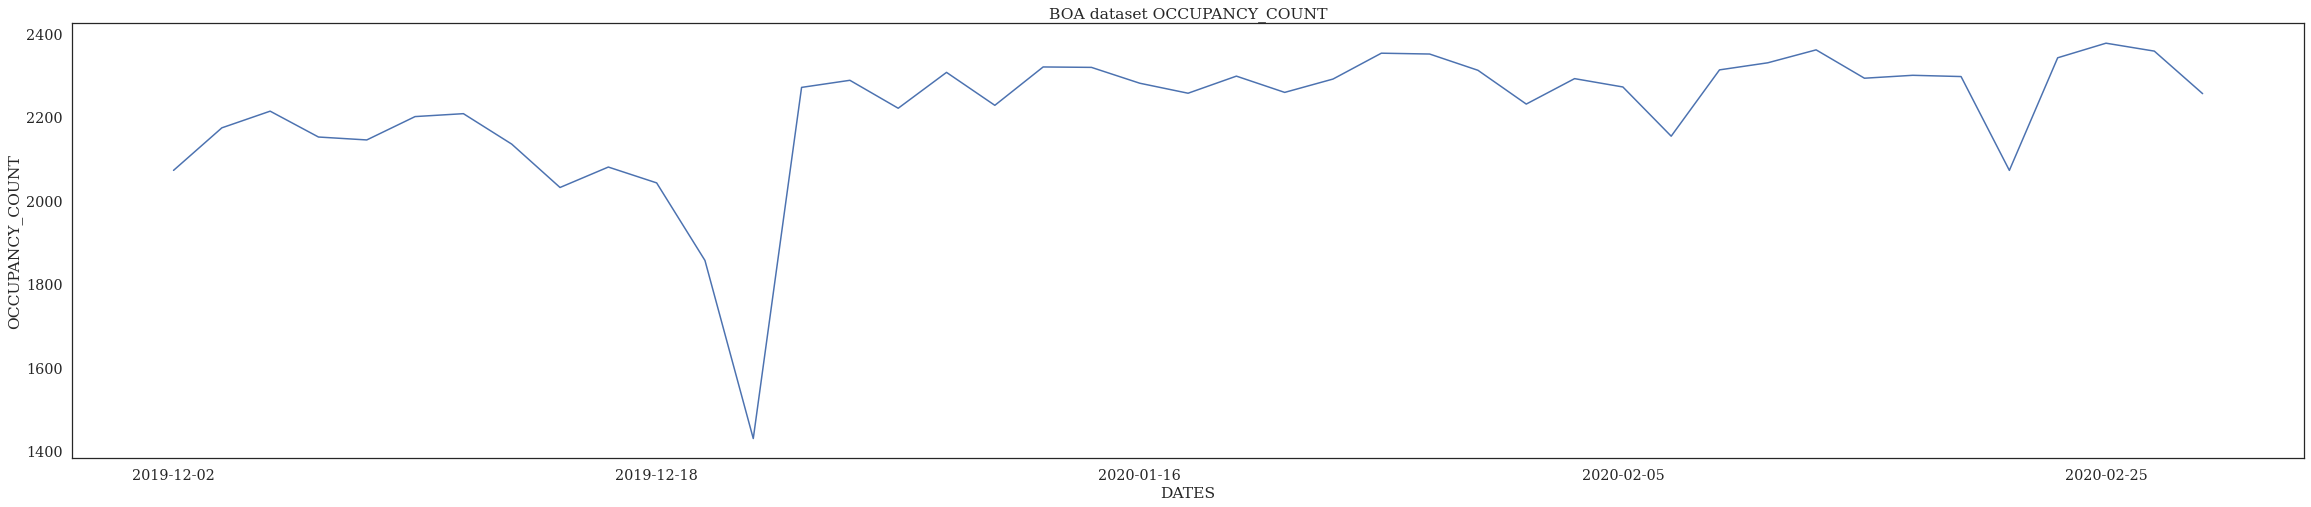

In [173]:
boa_dt_occ_plot = df_boa_grouped_dates['OCCUPANCY_COUNT'].plot(figsize=(40, 8))
boa_dt_occ_plot.set_ylabel('OCCUPANCY_COUNT')
plt.title('BOA dataset OCCUPANCY_COUNT')
plt.savefig("{}boa_dataset_occ_count.png".format(PATH_IMG), format="png")

# AON dataset

> ## Data preparation

In [88]:
df_aon_grouped_dates = df_aon.groupby(['DATES']).sum()

> ## Initial exploration

In [89]:
df_aon.head()

,SITE,OCCUPANCY_COUNT,DATES
0,Am Fin. Transformation,0,8/31/2020
1,Americas Finance,0,8/31/2020
2,Capital Markets,2,8/31/2020
3,CS,0,8/31/2020
4,CS Finance-43,0,8/31/2020


In [90]:
df_aon_grouped_dates.head()

,OCCUPANCY_COUNT
DATES,
10/1/2020,81
10/12/2020,74
10/13/2020,102
10/14/2020,87
10/15/2020,82


In [91]:
df_aon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4275 entries, 0 to 4274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SITE             4275 non-null   object
 1   OCCUPANCY_COUNT  4275 non-null   int64 
 2   DATES            4275 non-null   object
dtypes: int64(1), object(2)
memory usage: 100.3+ KB


In [92]:
df_aon.isna().sum()

SITE               0
OCCUPANCY_COUNT    0
DATES              0
dtype: int64

In [93]:
df_aon.isnull().sum()

SITE               0
OCCUPANCY_COUNT    0
DATES              0
dtype: int64

> ## Numeric variables

In [99]:
len(df_aon[df_aon['OCCUPANCY_COUNT'] == 0])

2580

In [100]:
len(df_aon)

4275

In [101]:
len(df_aon[df_aon['OCCUPANCY_COUNT'] == 0])/len(df_aon)

0.6035087719298246

In [102]:
len(df_aon_grouped_dates[df_aon_grouped_dates['OCCUPANCY_COUNT'] == 0])/len(df_aon_grouped_dates)

0.013333333333333334

In [94]:
aon_dt_num_var = df_aon._get_numeric_data().columns.values
aon_dt_num_var

array(['OCCUPANCY_COUNT'], dtype=object)

In [95]:
aon_dt_num_var.shape[0]

1

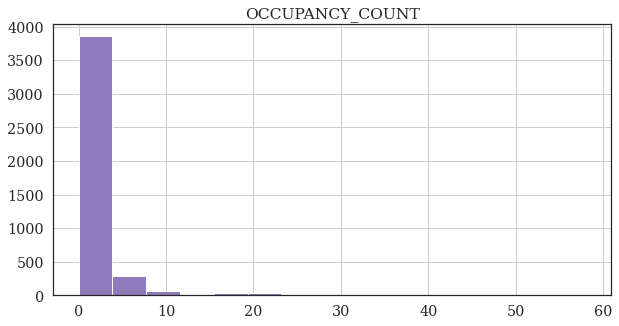

In [96]:
sns.set(style = 'white')
plt.rc('font', family='serif')

c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histogram of distributions
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df_aon[aon_dt_num_var].hist(bins = 15, color = colours[0], figsize = (10,5))
plt.savefig("{}aon_dataset_notgrouped_distribution_occ_count.png".format(PATH_IMG), format="png")

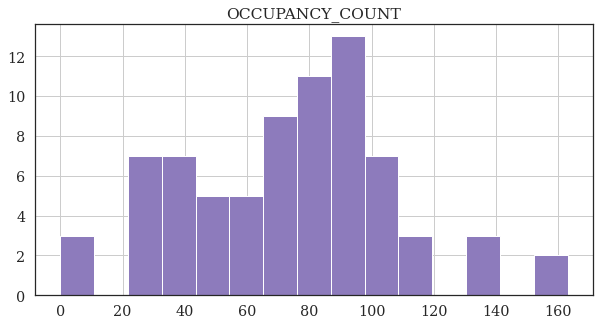

In [97]:
sns.set(style = 'white')
plt.rc('font', family='serif')

c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histogram of distributions
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df_aon_grouped_dates[aon_dt_num_var].hist(bins = 15, color = colours[0], figsize = (10,5))
plt.savefig("{}aon_dataset_distribution_occ_count.png".format(PATH_IMG), format="png")

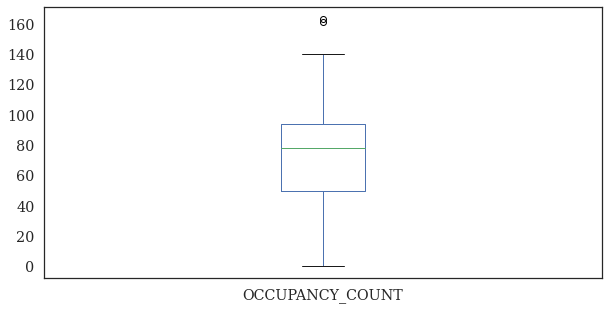

In [190]:
aon_dt_barplot_occ = df_aon_grouped_dates[aon_dt_num_var].plot(kind='box', figsize=[10,5])
plt.savefig("{}aon_dataset_barplot_occ_count.png".format(PATH_IMG), format="png")

In [193]:
df_aon_grouped_dates[aon_dt_num_var].describe()

,OCCUPANCY_COUNT
count,75.000000
mean,74.093333
std,34.509761
min,0.000000
25%,49.500000
50%,78.000000
75%,94.000000
max,163.000000


In [194]:
(df_aon_grouped_dates[boa_dt_num_var]==0).sum()

OCCUPANCY_COUNT    1
dtype: int64

> ## Normality
Identify outliers

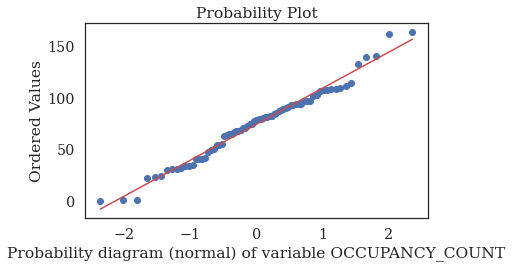

In [195]:
figname = "{}aon_dataset_probability_plot_occ_count.png".format(PATH_IMG)
normality_numeric_variables(df_aon_grouped_dates, 'OCCUPANCY_COUNT', save=True, figname=figname, figformat='png')

In [201]:
for num_col in aon_dt_num_var:
    _, pval = stats.normaltest(df_aon_grouped_dates[aon_dt_num_var])
    if(pval < 0.05):
        print("Column {} does not follow a normal distribution".format(num_col))
    else:
        print("Column {} follow a normal distribution".format(num_col))

Column OCCUPANCY_COUNT follow a normal distribution


> ## Categorical variables

In [202]:
aon_dt_all_variables = df_aon.columns.values
aon_dt_categorical_variables = np.setdiff1d(aon_dt_all_variables, aon_dt_num_var)
aon_dt_categorical_variables

array(['DATES', 'SITE'], dtype=object)

In [203]:
for i in df_aon[aon_dt_categorical_variables].columns.values:
    print("Values of ", i,'\n')
    print(df_aon[i].value_counts())
    print('\n\n')

Values of  DATES 

9/29/2020     57
9/25/2020     57
10/6/2020     57
9/15/2020     57
9/21/2020     57
              ..
9/22/2020     57
10/26/2020    57
11/24/2020    57
10/23/2020    57
10/8/2020     57
Name: DATES, Length: 75, dtype: int64



Values of  SITE 

IPS                         75
Marketing                   75
Product                     75
Property Mgmt Industrial    75
Markets Sales Enablement    75
Markets Marketing           75
Markets Property Mgmt       75
Property Mgmt Office-44     75
Legal                       75
PI / USPS                   75
Americas Finance            75
IT/Telecom                  75
Markets Global Hotels       75
Am Fin. Transformation      75
Markets Sol Finance         75
Risk                        75
CS                          75
Capital Markets             75
Markets VAS                 75
IT/Network Services         75
Markets Agency Leasing      75
IFM P&G                     75
IT/Deskside Support         75
HR                    

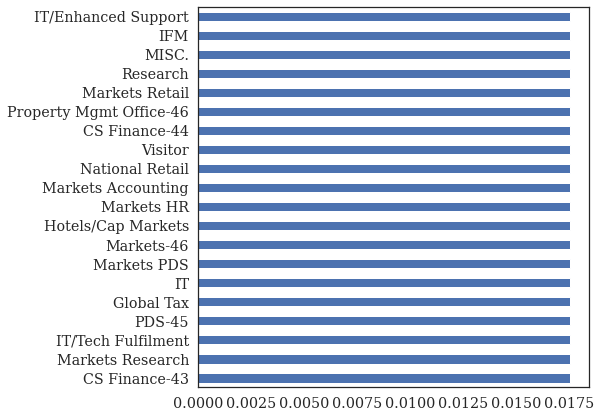

In [204]:
categoric_variable_distribution(df_aon, 'SITE', figsize=(7,7))

> ## Variations by one unit time (day)

In [205]:
displaced = df_aon_grouped_dates['OCCUPANCY_COUNT'].shift(1)
displaced[:5]

DATES
10/1/2020       NaN
10/12/2020     81.0
10/13/2020     74.0
10/14/2020    102.0
10/15/2020     87.0
Name: OCCUPANCY_COUNT, dtype: float64

In [207]:
df_aon_grouped_dates['var_diaria'] = df_aon_grouped_dates['OCCUPANCY_COUNT'].pct_change()
df_aon_grouped_dates['var_diaria'][:5]

DATES
10/1/2020          NaN
10/12/2020   -0.086420
10/13/2020    0.378378
10/14/2020   -0.147059
10/15/2020   -0.057471
Name: var_diaria, dtype: float64

>> ### Applying the Hodrick-Prescott filter to separate in trend and cyclic component.

In [210]:
oc_ciclo, oc_tend = sm.tsa.filters.hpfilter(df_aon_grouped_dates['OCCUPANCY_COUNT'])
df_aon_grouped_dates['oc_tend'] = oc_tend

In [211]:
daily_performance = (1 + df_aon_grouped_dates['OCCUPANCY_COUNT'].pct_change()).cumprod()
df_aon_grouped_dates['dai_performance'] = daily_performance
df_aon_grouped_dates['dai_performance']

DATES
10/1/2020          NaN
10/12/2020    0.913580
10/13/2020    1.259259
10/14/2020    1.074074
10/15/2020    1.012346
                ...   
9/30/2020          NaN
9/4/2020           NaN
9/7/2020           NaN
9/8/2020           NaN
9/9/2020           NaN
Name: dai_performance, Length: 75, dtype: float64

>> ### Zeros,nan,null after calculations

In [212]:
df_aon_grouped_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 10/1/2020 to 9/9/2020
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OCCUPANCY_COUNT  75 non-null     int64  
 1   var_diaria       74 non-null     float64
 2   oc_tend          75 non-null     float64
 3   dai_performance  35 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 5.0+ KB


In [213]:
df_aon_grouped_dates.var_diaria[df_aon_grouped_dates.var_diaria==0].count()

1

In [214]:
df_aon_grouped_dates.oc_tend[df_aon_grouped_dates.oc_tend==0].count()

0

In [215]:
df_aon_grouped_dates.isna().sum()

OCCUPANCY_COUNT     0
var_diaria          1
oc_tend             0
dai_performance    40
dtype: int64

In [216]:
df_aon_grouped_dates.isnull().sum()

OCCUPANCY_COUNT     0
var_diaria          1
oc_tend             0
dai_performance    40
dtype: int64

> ## Plots

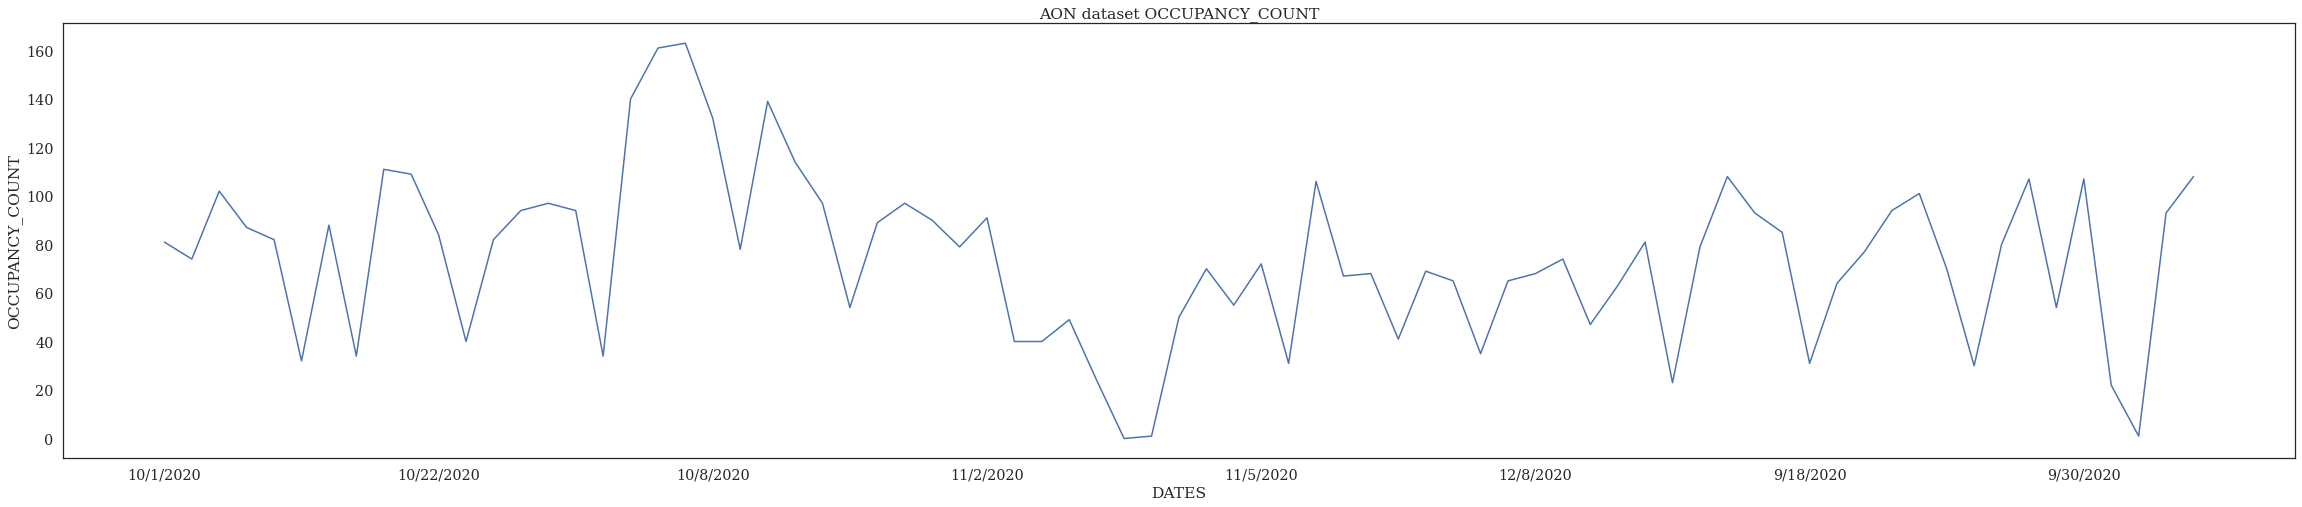

In [217]:
aon_dt_occ_plot = df_aon_grouped_dates['OCCUPANCY_COUNT'].plot(figsize=(40, 8))
aon_dt_occ_plot.set_ylabel('OCCUPANCY_COUNT')
plt.title('AON dataset OCCUPANCY_COUNT')
plt.savefig("{}aon_dataset_occ_count.png".format(PATH_IMG), format="png")